## Monitoria 3 - Econometría
### Pontificia Universidad Javeriana
#### Bases de Datos y Graficos

En este documento buscaremos dar una breve explicación de como unir bases de datos, y como realizar algunas estadísticas descriptivas condicionadas. Además daremos varios ejemplos de bases de datos usando la librería matplotlib y seaborn.

In [1]:
import pandas as pd 
import numpy as np 
import os 

pathout = './data/'
if not os.path.exists(pathout):
    os.mkdir(pathout) 
    pathgraphs = './graphs/'
    if not os.path.exists(pathgraphs): 
        os.mkdir(pathgraphs) 
import warnings
warnings.filterwarnings("ignore")

## 1. Bases de datos:

### 1.1 Importar Bases de datos y organizarlas:

El objetivo final sera unir dos bases de datos, pero antes de poder hacer esto, debemos importar una base de datos y ordenarla para poder usarla.

Las bases de datos que usaremos son datos de estudiantes graduados de educación superior en Colombia en los años 2018 y 2019, Estas bases se llaman grad2018 y grad2019.

In [2]:
grad2018 = pd.read_excel(pathout + 'grad2018.xlsx')

In [3]:
grad2018.head(10)
# Notese que la base de datos se importo pero sin nombres y ademas, los primeros 5 datos no nos sirven.

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,GRADUADOS EN EDUCACIÓN SUPERIOR - COLOMBIA 2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Fecha de corte de la información: Junio de 2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Fuente: Minsiterio de Educación Nacional - Obs...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,La información suministrada corresponde a lo r...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"Nota: Para el año 2018, de las 300 IES con per...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,CÓDIGO DE LA INSTITUCIÓN,IES_PADRE,INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES),PRINCIPAL O SECCIONAL,ID SECTOR IES,SECTOR IES,ID CARACTER,CARACTER IES,CÓDIGO DEL DEPARTAMENTO (IES),DEPARTAMENTO DE DOMICILIO DE LA IES,...,NÚCLEO BÁSICO DEL CONOCIMIENTO (NBC),CÓDIGO DEL DEPARTAMENTO (PROGRAMA),DEPARTAMENTO DE OFERTA DEL PROGRAMA,CÓDIGO DEL MUNICIPIO (PROGRAMA),MUNICIPIO DE OFERTA DEL PROGRAMA,ID SEXO,SEXO,AÑO,SEMESTRE,GRADUADOS
7,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,1,Hombre,2018,1,16
8,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,1,Hombre,2018,2,35
9,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,2,Mujer,2018,1,17


In [4]:
grad2018 = grad2018.drop([0,1, 2, 3, 4,5])  # Podemos eliminar filas de una base de datos de esta manera
grad2018

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
6,CÓDIGO DE LA INSTITUCIÓN,IES_PADRE,INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES),PRINCIPAL O SECCIONAL,ID SECTOR IES,SECTOR IES,ID CARACTER,CARACTER IES,CÓDIGO DEL DEPARTAMENTO (IES),DEPARTAMENTO DE DOMICILIO DE LA IES,...,NÚCLEO BÁSICO DEL CONOCIMIENTO (NBC),CÓDIGO DEL DEPARTAMENTO (PROGRAMA),DEPARTAMENTO DE OFERTA DEL PROGRAMA,CÓDIGO DEL MUNICIPIO (PROGRAMA),MUNICIPIO DE OFERTA DEL PROGRAMA,ID SEXO,SEXO,AÑO,SEMESTRE,GRADUADOS
7,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,1,Hombre,2018,1,16
8,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,1,Hombre,2018,2,35
9,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,2,Mujer,2018,1,17
10,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,2,Mujer,2018,2,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40519,9915,9915,UNIVERSITARIA VIRTUAL INTERNACIONAL,Principal,2,PRIVADA,3,Institución Universitaria/Escuela Tecnológica,11,BOGOTA D.C,...,Contaduría pública,11,BOGOTA D.C,11001,BOGOTA D.C.,1,Hombre,2018,1,1
40520,9915,9915,UNIVERSITARIA VIRTUAL INTERNACIONAL,Principal,2,PRIVADA,3,Institución Universitaria/Escuela Tecnológica,11,BOGOTA D.C,...,Contaduría pública,11,BOGOTA D.C,11001,BOGOTA D.C.,2,Mujer,2018,1,5
40521,9915,9915,UNIVERSITARIA VIRTUAL INTERNACIONAL,Principal,2,PRIVADA,3,Institución Universitaria/Escuela Tecnológica,11,BOGOTA D.C,...,Contaduría pública,11,BOGOTA D.C,11001,BOGOTA D.C.,2,Mujer,2018,2,1
40522,9922,9922,FUNDACION UNIVERSITARIA COMFAMILIAR RISARALDA,Principal,2,PRIVADA,3,Institución Universitaria/Escuela Tecnológica,66,RISARALDA,...,Contaduría pública,66,RISARALDA,66001,PEREIRA,1,Hombre,2018,2,1


In [5]:
#Notese que la primera fila contiene los nombres de las variables.

nombre_variables = grad2018.iloc[0] #Tomar la primera fila que contiene el nombre de las variables
grad2018.columns = nombre_variables #Cambiarle el nombre a las variables, pero no lo haremos aun
grad2018 = grad2018.drop([6]) #Eliminar la columna que tiene los nombres de las variables

In [6]:
grad2018.head(5)

6,CÓDIGO DE LA INSTITUCIÓN,IES_PADRE,INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES),PRINCIPAL O SECCIONAL,ID SECTOR IES,SECTOR IES,ID CARACTER,CARACTER IES,CÓDIGO DEL DEPARTAMENTO (IES),DEPARTAMENTO DE DOMICILIO DE LA IES,...,NÚCLEO BÁSICO DEL CONOCIMIENTO (NBC),CÓDIGO DEL DEPARTAMENTO (PROGRAMA),DEPARTAMENTO DE OFERTA DEL PROGRAMA,CÓDIGO DEL MUNICIPIO (PROGRAMA),MUNICIPIO DE OFERTA DEL PROGRAMA,ID SEXO,SEXO,AÑO,SEMESTRE,GRADUADOS
7,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,1,Hombre,2018,1,16
8,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,1,Hombre,2018,2,35
9,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,2,Mujer,2018,1,17
10,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,"Ingeniería agronómica, pecuaria y afines",11,BOGOTA D.C,11001,BOGOTA D.C.,2,Mujer,2018,2,12
11,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,Medicina veterinaria,11,BOGOTA D.C,11001,BOGOTA D.C.,1,Hombre,2018,1,8


Ahora debemos hacer lo mismo para los datos de 2019.

In [7]:
grad2019 = pd.read_excel(pathout + 'grad2019.xlsx')


In [8]:
grad2019 = grad2019.drop([0,1, 2, 3, 4,5,6])  # Eliminar las filas
nombre_variables2 = grad2019.iloc[0] #Tomar la primera fila que contiene el nombre de las variables
grad2019.columns = nombre_variables2 #Cambiarle el nombre a las variables, pero no lo haremos aun
grad2019 = grad2019.drop([7])  # Eliminar las filas
grad2019.head(10)

7,CÓDIGO DE LA INSTITUCIÓN,IES_PADRE,INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES),PRINCIPAL O SECCIONAL,ID SECTOR IES,SECTOR IES,ID CARACTER,CARACTER IES,CÓDIGO DEL DEPARTAMENTO (IES),DEPARTAMENTO DE DOMICILIO DE LA IES,...,SEXO,AÑO,SEMESTRE,GRADUADOS,ID CINE CAMPO AMPLIO,DESC CINE CAMPO AMPLIO,ID CINE CAMPO ESPECIFICO,DESC CINE CAMPO ESPECIFICO,ID CINE CODIGO DETALLADO,DESC CINE CODIGO DETALLADO
8,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,MUJER,2019,1,1,3,"CIENCIAS SOCIALES, PERIODISMO E INFORMACIÓN",31,CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,311,ECONOMÍA
9,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,HOMBRE,2019,1,1,9,SALUD Y BIENESTAR,91,SALUD,912,MEDICINA
10,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,HOMBRE,2019,1,5,3,"CIENCIAS SOCIALES, PERIODISMO E INFORMACIÓN",32,PERIODISMO E INFORMACIÓN,321,"PERIODISMO, COMUNICACIÓN Y REPORTAJES"
11,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,HOMBRE,2019,1,3,5,"CIENCIAS NATURALES, MATEMÁTICAS Y ESTADÍSTICA",53,CIENCIAS FÍSICAS,531,QUÍMICA
12,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,MUJER,2019,1,2,2,ARTE Y HUMANIDADES,22,HUMANIDADES (EXCEPTO IDIOMAS),223,FILOSOFÍA Y ÉTICA
13,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,MUJER,2019,1,2,2,ARTE Y HUMANIDADES,22,HUMANIDADES (EXCEPTO IDIOMAS),223,FILOSOFÍA Y ÉTICA
14,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,HOMBRE,2019,1,1,9,SALUD Y BIENESTAR,91,SALUD,912,MEDICINA
15,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,MUJER,2019,1,1,9,SALUD Y BIENESTAR,91,SALUD,912,MEDICINA
16,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,HOMBRE,2019,1,1,3,"CIENCIAS SOCIALES, PERIODISMO E INFORMACIÓN",31,CIENCIAS SOCIALES Y DEL COMPORTAMIENTO,314,"SOCIOLOGÍA, ANTROPOLOGÍA Y ESTUDIOS CULTURALES"
17,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,MUJER,2019,1,1,2,ARTE Y HUMANIDADES,21,ARTES,211,TÉCNICAS AUDIOVISUALES Y PRODUCCIÓN PARA MEDIO...


### 1.2 Unir bases de datos con "append":

Ahora uniremos ambas bases de datos con el comando append de numpy

In [9]:
grad = grad2018.append(grad2019, ignore_index=True)

In [10]:
grad

,CÓDIGO DE LA INSTITUCIÓN,IES_PADRE,INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES),PRINCIPAL O SECCIONAL,ID SECTOR IES,SECTOR IES,ID CARACTER,CARACTER IES,CÓDIGO DEL DEPARTAMENTO (IES),DEPARTAMENTO DE DOMICILIO DE LA IES,...,SEXO,AÑO,SEMESTRE,GRADUADOS,ID CINE CAMPO AMPLIO,DESC CINE CAMPO AMPLIO,ID CINE CAMPO ESPECIFICO,DESC CINE CAMPO ESPECIFICO,ID CINE CODIGO DETALLADO,DESC CINE CODIGO DETALLADO
0,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,Hombre,2018,1,16,NaN,NaN,NaN,NaN,NaN,NaN
1,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,Hombre,2018,2,35,NaN,NaN,NaN,NaN,NaN,NaN
2,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,Mujer,2018,1,17,NaN,NaN,NaN,NaN,NaN,NaN
3,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,Mujer,2018,2,12,NaN,NaN,NaN,NaN,NaN,NaN
4,1101,1101,UNIVERSIDAD NACIONAL DE COLOMBIA,Principal,1,OFICIAL,4,Universidad,11,BOGOTA D.C,...,Hombre,2018,1,8,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82934,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,MUJER,2019,1,2,7,"INGENIERÍA, INDUSTRIA Y CONSTRUCCIÓN",73,ARQUITECTURA Y CONSTRUCCIÓN,732,CONSTRUCCIÓN E INGENIERÍA CIVIL
82935,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,MUJER,2019,1,3,9,SALUD Y BIENESTAR,91,SALUD,912,MEDICINA
82936,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,HOMBRE,2019,1,2,9,SALUD Y BIENESTAR,91,SALUD,913,ENFERMERÍA Y PARTERÍA
82937,1701,1701,PONTIFICIA UNIVERSIDAD JAVERIANA,PRINCIPAL,2,PRIVADA,4,UNIVERSIDAD,11,BOGOTÁ D.C.,...,HOMBRE,2019,1,3,3,"CIENCIAS SOCIALES, PERIODISMO E INFORMACIÓN",32,PERIODISMO E INFORMACIÓN,322,"BIBLIOTECOLOGÍA, INFORMACIÓN Y ARCHIVOLOGÍA"


Si queremos ver que variables tenemos, podemos usar el siguiente comando:

In [11]:
list(grad)

['CÓDIGO DE LA INSTITUCIÓN',
 'IES_PADRE',
 'INSTITUCIÓN DE EDUCACIÓN SUPERIOR (IES)',
 'PRINCIPAL O SECCIONAL',
 'ID SECTOR IES',
 'SECTOR IES',
 'ID CARACTER',
 'CARACTER IES',
 'CÓDIGO DEL DEPARTAMENTO (IES)',
 'DEPARTAMENTO DE DOMICILIO DE LA IES',
 'CÓDIGO DEL MUNICIPIO',
 'MUNICIPIO DE DOMICILIO DE LA IES',
 'CÓDIGO SNIES DEL PROGRAMA',
 'PROGRAMA ACADÉMICO',
 'ID NIVEL ACADÉMICO',
 'NIVEL ACADÉMICO',
 'ID NIVEL DE FORMACIÓN',
 'NIVEL DE FORMACIÓN',
 'ID METODOLOGÍA',
 'METODOLOGÍA',
 'ID ÁREA',
 'ÁREA DE CONOCIMIENTO',
 'ID NÚCLEO',
 'NÚCLEO BÁSICO DEL CONOCIMIENTO (NBC)',
 'CÓDIGO DEL DEPARTAMENTO (PROGRAMA)',
 'DEPARTAMENTO DE OFERTA DEL PROGRAMA',
 'CÓDIGO DEL MUNICIPIO (PROGRAMA)',
 'MUNICIPIO DE OFERTA DEL PROGRAMA',
 'ID SEXO',
 'SEXO',
 'AÑO',
 'SEMESTRE',
 'GRADUADOS',
 'ID CINE CAMPO AMPLIO',
 'DESC CINE CAMPO AMPLIO',
 'ID CINE CAMPO ESPECIFICO',
 'DESC CINE CAMPO ESPECIFICO',
 'ID CINE CODIGO DETALLADO',
 'DESC CINE CODIGO DETALLADO']

#### Nota: Esta vez usamos el comando append para poner la base de datos 2 debajo de la base de datos 1. Podría darse el caso en el que quisiéramos poner una al lado de la otra, por lo que necesitaríamos usar el comando merge de numpy. Un ejemplo de esto seria:

### 1.3 Unir Bases de datos con "Merge":

Supongamos que quisieramos unir estas bases de datos pero poniendo una al lado de la otra. Esto lo hariamos de la siguiente manera:

In [12]:
#gradmerge = pd.merge(grad2018, grad2019)
#gradmerge
#Dado la forma de los datos, esto no funcionara, pero un ejemplo practico de lo anterior seria el siguiente:

In [13]:
#Creemos 2 bases de datos cualquiera
df1 = pd.DataFrame({'Empleado': ['Carlos', 'Maria', 'Juan', 'Valentina'],
                    'Carrera': ['Contador', 'Ingeniero', 'Economista', 'Administrador']})
df2 = pd.DataFrame({'Empleado': ['Carlos', 'Maria', 'Juan', 'Valentina'],
                    'Año de contratación': [2015, 2019, 2020, 2020]})
df1

,Empleado,Carrera
0,Carlos,Contador
1,Maria,Ingeniero
2,Juan,Economista
3,Valentina,Administrador


In [14]:
df2

,Empleado,Año de contratación
0,Carlos,2015
1,Maria,2019
2,Juan,2020
3,Valentina,2020


Si quisiéramos unirlas, lo haríamos de la siguiente manera:

In [15]:
#Se uniran las bases de datos según variable que sea igual en ambas bases. En este caso, el nombre de los empleados.
df3 = pd.merge(df1, df2)
df3

,Empleado,Carrera,Año de contratación
0,Carlos,Contador,2015
1,Maria,Ingeniero,2019
2,Juan,Economista,2020
3,Valentina,Administrador,2020


### 2. Filtrar datos:
Para ver como podemos filtrar datos según alguna condición volveremos a los datos que guardamos en la base grad que contiene información de estudiantes graduados 2018 y 2019.

In [16]:
# Estudiantes graduados de la Javeriana en 2018
javeriana = grad2018['CÓDIGO DE LA INSTITUCIÓN'] == 1701

grad_jave_2018 = grad2018.loc[javeriana, 'GRADUADOS'].sum()
print(grad_jave_2018)

5981


In [17]:
# Estudiantes graduados de la Javeriana en 2019
javeriana = grad2019['CÓDIGO DE LA INSTITUCIÓN'] == 1701

grad_jave_2019 = grad2019.loc[javeriana, 'GRADUADOS'].sum()
print(grad_jave_2019)

5714


In [18]:
#Estudiantes graduados en Bogota
bogota = grad['CÓDIGO DEL DEPARTAMENTO (IES)'] == 11

grad_bogota = grad.loc[bogota, 'GRADUADOS'].sum()
print(grad_bogota)


288067


In [19]:
#Estudiantes graduados de economia en 2018 de la javeriana
#Creamos una nueva base de datos para los graduados de la javeriana en 2018
#Al poner la condicióm != estamos eliminando los datos diferentes a 1701, que es el codigo de la Javeriana
javegrad2018 = grad2018.drop(grad2018[grad2018['CÓDIGO DE LA INSTITUCIÓN'] != 1701].index)

#Los estudiantes de pregrado en economia estan guardados en la variable "ID NÚCLEO" con el numero 611
economia = javegrad2018['ID NÚCLEO'] == 611

grad_economia_javeriana = javegrad2018.loc[economia, 'GRADUADOS'].sum()
print(grad_economia_javeriana)


128


### 3. Graficas
Ahora usaremos las librerías matplotlib y seaborn para realizar varias graficas que nos ayuden a entender mejor nuestros datos

In [20]:
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 


Usando la base de datos grad hagamos un grafico de barras para ver los estudiantes hombres de la javeriana segun la carrera. Para lo anterior, filtremos los datos por año, semestre, universidad y por pregrado.

In [21]:
#Filtrando los datos para el 2018 - 1
javegrad20182 = grad2018.drop(grad2018[grad2018['CÓDIGO DE LA INSTITUCIÓN'] != 1701].index) #Filtrando por Javeriana
jave_preg_2018 = javegrad20182.drop(javegrad20182[javegrad20182['ID NIVEL ACADÉMICO']!=1].index) #Filtrando por Pregrado
jave_preg_2018_fcea = jave_preg_2018.drop(jave_preg_2018[jave_preg_2018['ID ÁREA']!=6].index) #Filtrando por CEA
jave_preg_2018_fcea_1 = jave_preg_2018_fcea.drop(jave_preg_2018_fcea[jave_preg_2018_fcea['SEMESTRE']!=1].index) #Filtrando por semestre

### 3.1 Grafico de Barras

Text(0, 0.5, 'Cantidad')

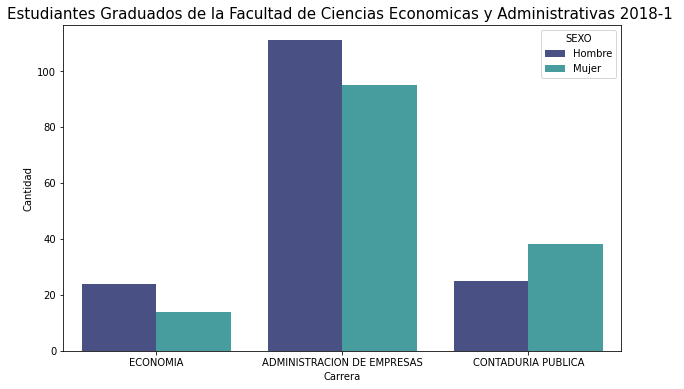

In [22]:
#Seaborn barplot
bar,ax = plt.subplots(figsize=(10,6))
ax = sns.barplot(x=jave_preg_2018_fcea_1['PROGRAMA ACADÉMICO'], y=jave_preg_2018_fcea_1['GRADUADOS'], hue=jave_preg_2018_fcea_1['SEXO'] ,  data=jave_preg_2018_fcea_1, ci=None, palette="mako",orient='v', )

ax.set_title("Estudiantes Graduados de la Facultad de Ciencias Economicas y Administrativas 2018-1 ", fontsize=15)
ax.set_xlabel ("Carrera")
ax.set_ylabel ("Cantidad")

### 3.2 Grafico de Pie

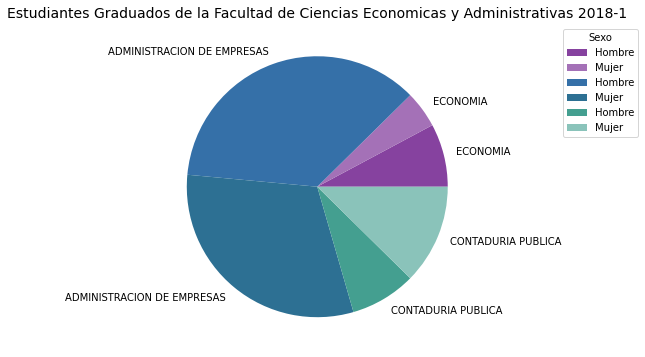

In [23]:
#Matplotlib pie chart

#Using matplotlib
pie, ax2 = plt.subplots(figsize=[10,6])
labels = jave_preg_2018_fcea_1['PROGRAMA ACADÉMICO']
plt.pie(x=jave_preg_2018_fcea_1['GRADUADOS'], colors = ['#86429f',
'#a471b7' , '#3570a8' , '#2d7093' , '#449f90' , '#8ac3ba'], labels=labels, pctdistance=0.5)


ax2.legend(jave_preg_2018_fcea_1['SEXO'],
          title="Sexo",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.title("Estudiantes Graduados de la Facultad de Ciencias Economicas y Administrativas 2018-1", fontsize=14);



Ahora usaremos la base de datos llamada WAGE1

In [24]:
WAGE = pd.read_stata(pathout + 'WAGE1.dta')
WAGE.head(1)

,wage,educ,exper,tenure,nonwhite,female,married,numdep,smsa,northcen,...,trcommpu,trade,services,profserv,profocc,clerocc,servocc,lwage,expersq,tenursq
0,3.1,11,2,0,0,1,0,2,1,0,...,0,0,0,0,0,0,0,1.131402,4,0


### 3.3 Grafica de Regresión

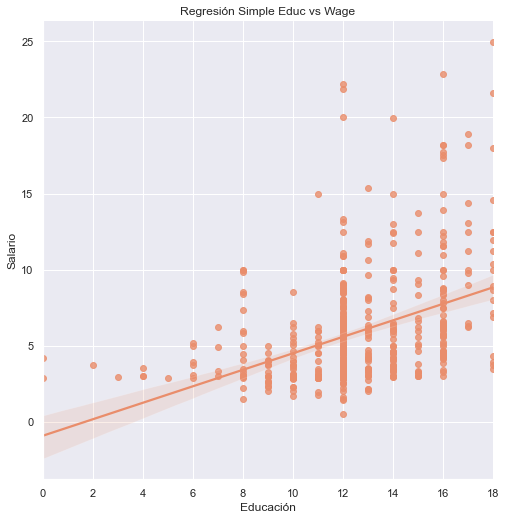

In [25]:
sns.set_theme(palette = "flare")
ax3 = sns.lmplot(data=WAGE, x="educ", y="wage", height=7)

plt.title("Regresión Simple Educ vs Wage")
ax3.set_axis_labels("Educación", "Salario")


### 3.4 Grafico Boxplot

Text(0.5, 1.0, 'Box plot Educación - Salario por hora')

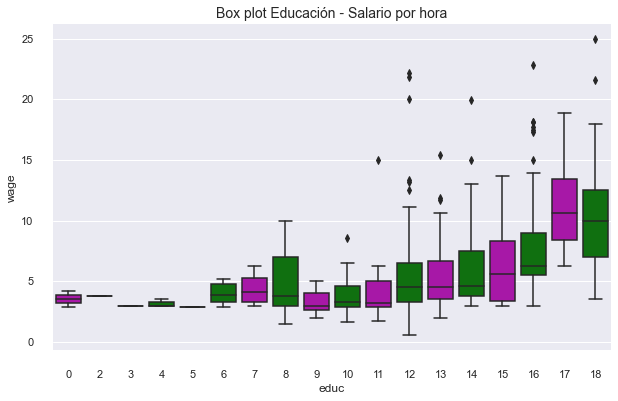

In [26]:
#Boxplot usando seaborn
plt.subplots(figsize=[10,6])
ax4 = sns.boxplot(x="educ", y="wage",
             palette=["m", "g"],
            data=WAGE)
sns.despine(offset=10, trim=True)
sns.set_theme(style="whitegrid")
plt.title("Box plot Educación - Salario por hora",  fontsize=14)


### 3.5 Grafico de densidad y Kernell

Text(0.5, 1.0, 'Grafica de Densidad y Kernell del salario por hora')

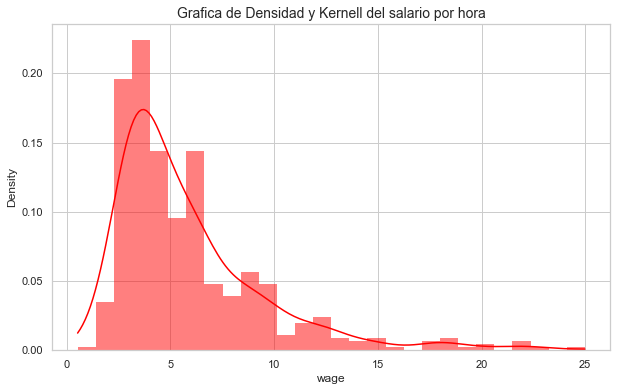

In [27]:
#Grafica de densidad y Kernell con seaborn
plt.subplots(figsize=[10,6])
sns.histplot(WAGE.wage, color="red", label="100% Equities", kde=True, stat="density", linewidth=0)

plt.title("Grafica de Densidad y Kernell del salario por hora",  fontsize=14)


### 4. Precios de Acciones
En esta parte mostraremos como traer el precio de diferentes acciones a Python usando la libreria pandas_datareader.

In [28]:
import pandas_datareader as web
import datetime as dt

In [29]:
empresa = 'FB'

In [30]:
inicio = dt.datetime(2012,1,1)
final = dt.datetime(2021,1,1)

In [31]:
facebook = web.DataReader(empresa, 'yahoo',inicio ,final)

In [32]:
facebook

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-05-18,45.000000,38.000000,42.049999,38.230000,573576400,38.230000
2012-05-21,36.660000,33.000000,36.529999,34.029999,168192700,34.029999
2012-05-22,33.590000,30.940001,32.610001,31.000000,101786600,31.000000
2012-05-23,32.500000,31.360001,31.370001,32.000000,73600000,32.000000
2012-05-24,33.209999,31.770000,32.950001,33.029999,50237200,33.029999
...,...,...,...,...,...,...
2020-12-24,270.399994,266.200012,268.880005,267.399994,6702000,267.399994
2020-12-28,277.299988,265.660004,268.739990,277.000000,23299700,277.000000
2020-12-29,280.510010,276.279999,276.950012,276.779999,16383000,276.779999


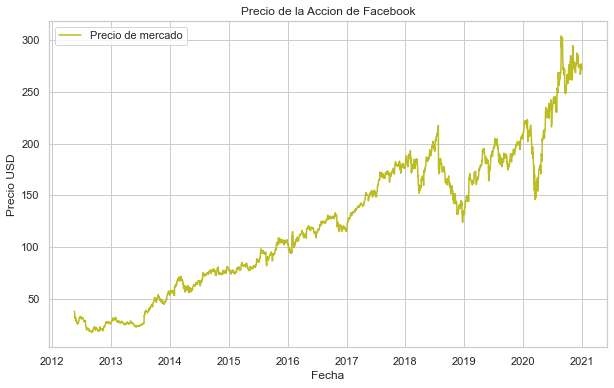

In [33]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(facebook.Close, color='tab:olive' ,label='Precio de mercado')

ax.set_xlabel('Fecha')
ax.set_ylabel('Precio USD')
ax.set_title('Precio de la Accion de Facebook')
ax.grid(True)
ax.legend(loc='upper left');

Este es el final del tercer documento de Introducción a Python para el análisis de datos. Si necesitan cualquier cosa pueden ponerse en contacto conmigo al correo Juan.rinconp@javeriana.edu.co